# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.975541e+01     6.520634e+00
 * time: 0.0045049190521240234
     1     2.616949e+01     5.254047e+00
 * time: 0.013741016387939453
     2     1.971827e+01     5.263373e+00
 * time: 0.0359349250793457
     3     1.795297e+01     6.875000e+00
 * time: 0.057183027267456055
     4     1.273168e+01     2.694328e+00
 * time: 0.07678985595703125
     5     1.097192e+01     1.485577e+00
 * time: 0.09625506401062012
     6     1.037130e+01     2.058081e+00
 * time: 0.11146092414855957
     7     9.766603e+00     7.958002e-01
 * time: 0.18191885948181152
     8     9.523132e+00     9.393824e-01
 * time: 0.19719505310058594
     9     9.290195e+00     1.072039e+00
 * time: 0.21274685859680176
    10     9.148418e+00     4.503330e-01
 * time: 0.22822785377502441
    11     9.050118e+00     4.314078e-01
 * time: 0.24357986450195312
    12     8.977269e+00     6.425887e-01
 * time: 0.25517797470092773
    13     8.904953e+00     4.995135e-01
 * ti

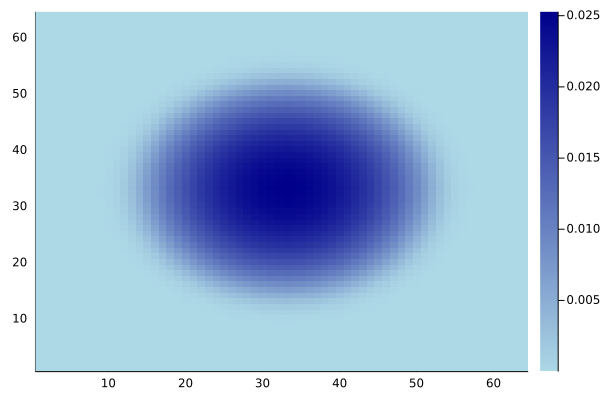

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)